<a href="https://colab.research.google.com/github/Oohgu/-/blob/main/it_%EA%B3%BC%EC%A0%9C_1816650_%EA%B9%80%EB%AF%BC%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 교수님 이 위의 31번 차트까지는 과제물은 10월 31일날 제출하였던 과제의 피드백을 반영하여 수정해본 코드로, 스스로 해결해본 결과를 추가적으로 보여드리고자 넣게 되었습니다. (피드백 내용: 한글 오류 패치/성별 차트 설명부족)

* 11월 21일 과제는 부제를 달아두었으니 그 부분부터 확인해주시고 의사결정나무를 사용해보려 했지만 공부한 내용을 실전에 적용하는 것에 어려움을 겪어 제대로 된 과제수행을 하지 못하여 죄송합니다. 나중에 적어주시는 패드백을 가지고 다시 개인적으로 공부하여 숙지하겠습니다.

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [16]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [17]:
import pandas as pd

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigMining/data/health_data.csv' )
data.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [20]:
data_columns = data.copy()

In [21]:
data_columns.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')

In [22]:
data_columns = data_columns[['성별코드','연령대코드(5세단위)','흡연상태','음주여부', '치석']]
data_columns.head()

,성별코드,연령대코드(5세단위),흡연상태,음주여부,치석
0,M,9,No,No,NaN
1,F,13,No,No,NaN
2,F,12,No,No,NaN
3,M,13,No,No,0.0
4,F,12,No,No,NaN


In [23]:
import pandas as pd
from pandas import Series, DataFrame as plt
import seaborn as sns

In [24]:
import warnings  
warnings.filterwarnings('ignore')

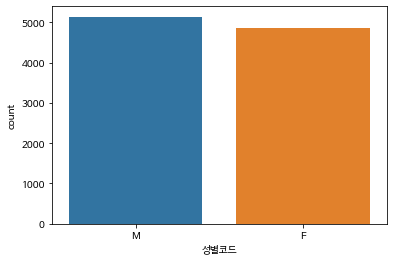

In [25]:
sns.countplot(data=data, x='성별코드');

> 데이터내 성별의 비중이 한쪽으로 치우치지 않았는지 확인하여, 검진 대상의 신뢰성 확인을 해보았다.

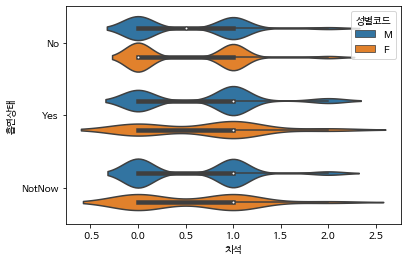

In [26]:
sns.violinplot(data=data, x='치석', y='흡연상태', hue='성별코드') 

> 흡연상태에 따른 치석 여부를 확인해본 결과, 흡연자의 치석이 더 심한 것을 알 수 있었다.

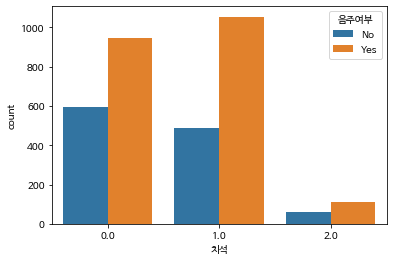

In [27]:
sns.countplot(x="치석", data=data, hue="음주여부")

> 음주여부에 따른 치석상태를 확인해본 결과 음주를 했을 때 치석이 많은 것을 알 수 있었다.

In [29]:
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 315 kB 29.3 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 102 kB 60.7 MB/s 
     |████████████████████████████████| 9.9 MB 54.3 MB/s 
     |████████████████████████████████| 690 kB 56.3 MB/s 
     |████████████████████████████████| 4.7 MB 58.3 MB/s 
     |████████████████████████████████| 296 kB 56.5 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=79dc129984aa79ac864c507bbf76a83c1720d57a4ecf2c68c76bb0b818453060
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
  Attempting uninstall: requests
  

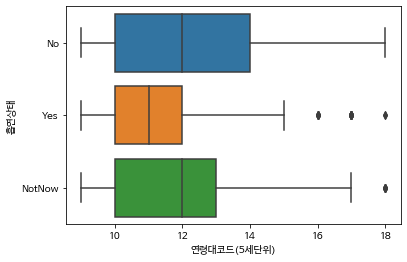

In [31]:
sns.boxplot(data=data, x='연령대코드(5세단위)', y='흡연상태');

> 흡연을 시작하는 나이는 평균 10~12세 사이로 일찍 시작하는 편이며 개개인의 차이가 있을 수 있다.

## 11/21 과제 

1. 흥미로운 분류 문제 선정: 종속/독립 변수 선택

In [39]:
data.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [40]:
X = data[data.columns[1:46]]
X.head()

,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,1,36,M,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2,27,F,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,3,11,F,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,4,31,M,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,5,41,F,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [37]:
from sklearn.model_selection import train_test_split

In [47]:
y = data[["구강검진수검여부"]]
y.head()

,구강검진수검여부
0,0
1,0
2,0
3,1
4,0


 2. 최적의 분류 모델 선택 (분류 기법, 파라미터) 및 평가 결과

In [48]:
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42)

In [49]:
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)

In [66]:
grid_search.fit(X_train, y_train)

ValueError: ignored

3. 분류 모델을 통한 인사이트 도출: 중요 변수 설명 등
